# **CS181 Textbook Figures**

This notebook generates all the figures found in the CS181 textbook.

## **Preliminaries**

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

### Plotting presets

In [2]:
plt.rcParams.update({
        'font.family' : 'Computer Modern',
        'font.size' : 9,
        'axes.titlesize' : 9,
        'axes.labelsize' : 8,
        'xtick.labelsize' : 8,
        'ytick.labelsize' : 8,
        'legend.fontsize': 8,
        'lines.markersize': 2,
        'legend.shadow' : False,
        'legend.framealpha' : 1,
        'legend.fancybox' : True,
        'legend.edgecolor' : 'gray',
        'legend.handlelength' : 1,
        'text.usetex' : True,
        'text.latex.preamble' : r'''
    \usepackage{amsmath}
    \usepackage{amssymb}
    % \usepackage{times}
    % \usepackage{amsfonts}
''',
    }) 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Other

In [3]:
greens = ['#295827', '#7bbf64', '#cbf6bb']
blues = ['#291b85', '#6653e0', '#c6befa']
reds = ['#841a1a', '#e15454', '#fabdbd']

## **Cover**

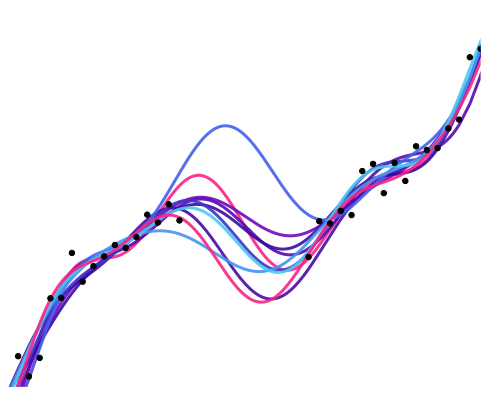

In [99]:
def get_posterior_samples(prior_var, noise_var, x_matrix, y_matrix, x_test_matrix, samples=100):
    '''Function to generate posterior predictive samples for Bayesian linear regression model'''
    prior_variance = np.diag(prior_var * np.ones(x_matrix.shape[1]))
    prior_precision = np.linalg.inv(prior_variance)

    joint_precision = prior_precision + x_matrix.T.dot(x_matrix) / noise_var
    joint_variance = np.linalg.inv(joint_precision)
    joint_mean = joint_variance.dot(x_matrix.T.dot(y_matrix)) / noise_var

    #sampling 100 points from the posterior
    posterior_samples = np.random.multivariate_normal(joint_mean.flatten(), joint_variance, size=samples)

    #take posterior predictive samples
    posterior_predictions = np.dot(posterior_samples, x_test_matrix.T) 
    posterior_predictive_samples = posterior_predictions[np.newaxis, :, :] + np.random.normal(0, noise_var**0.5, size=(100, posterior_predictions.shape[0], posterior_predictions.shape[1]))
    posterior_predictive_samples = posterior_predictive_samples.reshape((100 * posterior_predictions.shape[0], posterior_predictions.shape[1]))
    return posterior_predictions, posterior_predictive_samples


def generate_data(number_of_points=10, noise_variance=0.3):
    '''Function for generating toy regression data'''
    #training x
    x_train = np.hstack((np.linspace(-1.5, -0.3, number_of_points), np.linspace(0.3, 1.5, number_of_points)))
    #function relating x and y
    f = lambda x: 3 * x**3
    #y is equal to f(x) plus gaussian noise
    y_train = f(x_train) + np.random.normal(0, noise_variance**0.5, 2 * number_of_points)
    x_test = np.array(list(set(list(np.hstack((np.linspace(-1, 1, 200), x_train))))))
    x_test = np.sort(x_test)
    return x_train, y_train, x_test

noise_variance = 0.15
D = 14
N = 25

scatter_color = 'black'
line_color = 'tomato'

def bootstrap(D, N, a):
  x_train, y_train, x_test = generate_data(number_of_points=N, noise_variance=noise_variance)
  poly = PolynomialFeatures(D)
  if a:
    linear_model = Ridge(alpha=a, fit_intercept=False)
  else:
    linear_model = LinearRegression(fit_intercept=False)

  trials = 200
  y_tests = []
  for _ in range(trials):
    indices = np.random.choice(np.arange(len(x_train)), size=len(x_train))
    bootstrap_x = x_train[indices]
    bootstrap_y = y_train[indices]
    
    bootstrap_x_poly = poly.fit_transform(bootstrap_x.reshape((-1, 1)))
    bootstrap_x_test_poly = poly.fit_transform(x_test.reshape((-1, 1)))
    linear_model.fit(bootstrap_x_poly, bootstrap_y)

    y_test = linear_model.predict(bootstrap_x_test_poly)
    y_tests.append(y_test)
  
  return x_train, y_train, x_test, *np.percentile(y_tests, (2.5, 50, 97.5), axis=0), y_tests


fig, ax = plt.subplots(1, 1, figsize=(8.5,7))
x_train, y_train, x_test, lb, mean, ub, y_tests = bootstrap(D, N, None)
ax.scatter(x_train, y_train, c='black', s=30)
for i, y_test in enumerate(y_tests[::20]):
  colors = ["#f72585","#7209b7","#560bad","#480ca8","#3a0ca3","#3f37c9","#4361ee","#4895ef","#4cc9f0"]
  ax.plot(x_test, y_test, c=colors[i%len(colors)], linewidth=3, zorder=-1, alpha=0.9)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-4, 5)
ax.axis('off')

fig.savefig('figs/cover.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

## **Chapter 2**

### Figure 2.1

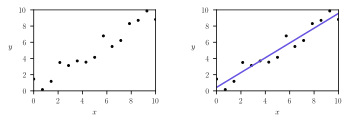

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(5.5, 1.5))
fig.subplots_adjust(wspace=0.5)

x = np.linspace(0, 10, 15)
y = x + np.random.normal(size=x.shape)

for ax in axs:
  ax.set_ylim(0, 10)
  ax.set_xlim(0, 10)
  ax.set_xticks((0, 2, 4, 6, 8, 10))
  ax.set_yticks((0, 2, 4, 6, 8, 10))
  ax.scatter(x, y, color='black')
  ax.set_xlabel('$x$')
  ax.set_ylabel('$y$', rotation=0, labelpad=8)

lr = LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1, 1))
axs[1].plot(x, lr.predict(x.reshape(-1, 1)), color=blues[1])

# fig.savefig('figs/simple-lin-reg.pdf')
plt.show()

### Figure 2.2

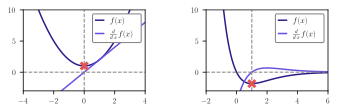

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(5.5, 1.5))
fig.subplots_adjust(wspace=0.5)

ax = axs[0]
x = np.linspace(-4, 4, 100)
y = x**2 + 1
dy = 2*x

ax.set_xlim(-4, 4)
ax.set_ylim(-3, 10)
ax.plot(x, y, color=blues[0], label='$f(x)$')
ax.plot(x, dy, color=blues[1], label=r'$\frac{d}{d\,x} \, f(x)$')
ax.axvline(x=0, color='gray', linestyle='--', linewidth=1)
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax.scatter(0, 1, marker='x', color=reds[1], s=50, linewidths=3, zorder=2)
ax.legend(loc='upper right')


ax = axs[1]
x = np.linspace(-2, 6, 100)
y = 5 * np.exp(-x) * (-x)
dy = 5 * (-np.exp(-x) + np.exp(-x) * x)

ax.set_xlim(-2, 6)
ax.set_ylim(-3, 10)
ax.plot(x, y, color=blues[0], label='$f(x)$')
ax.plot(x, dy, color=blues[1], label=r'$\frac{d}{d\,x} \, f(x)$')
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=1, color='gray', linestyle='--', linewidth=1)
ax.scatter(1, -1.84, marker='x', color=reds[1], s=50, linewidths=3, zorder=2)
ax.legend(loc='upper right')

# fig.savefig('figs/lin-reg-minima.pdf')
plt.show()

### Figure 2.3

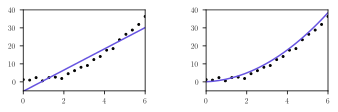

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(5.5, 1.5))
fig.subplots_adjust(wspace=0.5)

x = np.linspace(0, 6, 20)
y = x**2 + np.random.normal(size=x.shape)


for ax in axs:
  ax.set_ylim(-5, 40)
  ax.set_xlim(0, 6)
  ax.scatter(x, y, color='black')

# lr = LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1, 1))
# axs[0].plot(x, lr.predict(x.reshape(-1, 1)), color=blues[1])

lr = LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1, 1))
axs[0].plot(x, lr.predict(x.reshape(-1, 1)), color=blues[1])

lr = LinearRegression().fit(x.reshape(-1, 1)**2, y.reshape(-1, 1))
axs[1].plot(x, lr.predict(x.reshape(-1, 1))**2, color=blues[1])

plt.show()

### Figure 2.4 and 2.5

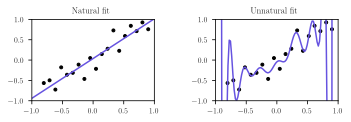

In [147]:
fig, axs = plt.subplots(1, 2, figsize=(5.5, 1.5))
fig.subplots_adjust(wspace=0.5)

D = 17
x_train = np.linspace(-0.9, 0.9, 20)
x_test = np.linspace(-1, 1, 100)
y_train = x_train + np.random.normal(0, 0.2, size=x_train.shape)

def ridge_test(alpha, D):
  lr = Ridge(alpha=alpha) if alpha else LinearRegression()
  transform = PolynomialFeatures(D).fit_transform
  phi_train = transform(x_train.reshape(-1, 1))
  phi_test = transform(x_test.reshape(-1, 1))
  lr.fit(phi_train, y_train)
  return lr.predict(phi_test)

for ax in axs:
  ax.set_ylim(-1, 1)
  ax.set_xlim(-1, 1)
  ax.scatter(x_train, y_train, color='black', zorder=2)

axs[0].plot(x_test, ridge_test(0, 1), color=blues[1])
axs[0].set_title('Natural fit')
axs[1].plot(x_test, ridge_test(0, D), color=blues[1])
axs[1].set_title('Unnatural fit')

plt.show()

0
1
1000


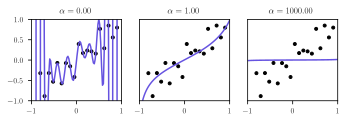

In [146]:
fig, axs = plt.subplots(1, 3, figsize=(5.5, 1.5))
fig.subplots_adjust(wspace=0.2)

D = 20
alphas = [0, 1, 1000]

for alpha, ax in zip(alphas, axs):
  print(alpha)
  ax.set_title(fr'$\alpha = {alpha:.2f}$')
  ax.set_ylim(-1, 1)
  ax.set_xlim(-1, 1)
  ax.scatter(x_train, y_train, color='black', zorder=2)
  ax.plot(x_test, ridge_test(alpha, D), color=blues[1])

for ax in axs[1:]:
  ax.set_yticks([])

plt.show()

## **Chapter 3**

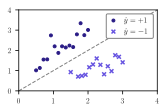

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 1.5))

x1 = np.linspace(0.5, 2, 15)
y1 = x1 + np.abs(np.random.normal(0, 0.7, size=x1.shape)) + 0.5
x2 = np.linspace(1.5, 3, 15)
y2 = x2 - np.abs(np.random.normal(0, 0.7, size=x2.shape)) - 0.5


ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.scatter(x1, y1, color=blues[0], label='$\hat y = +1$')
ax.scatter(x2, y2, color=blues[1], marker='x', s=15, linewidths=1.5, label='$\hat y = -1$')
x = y = np.linspace(0, 4)
ax.plot(x, y, color='gray', linestyle='--', linewidth=1)
ax.legend(loc='upper right')

# fig.savefig('figs/lin-sep.pdf')
plt.show()

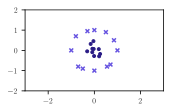

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 1.5))

x1, y1 = np.random.multivariate_normal([0, 0], 0.03 * np.eye(2), 10).T
x2, y2 = np.random.multivariate_normal([0, 0], np.eye(2), 10).T
x2 = np.array([-1, -.5, -.8, -.7, -.3,  0, 0,  .5, .55,  .7, 1, .85])
y2 = np.array([0 , -.9, .7 , -.8, .95, -1, 1, 0.9, -.8, -.7, 0, .5])

ax.set_xlim(-3, 3)
ax.set_ylim(-2, 2)
ax.scatter(x1, y1, color=blues[0])
ax.scatter(x2, y2, color=blues[1], marker='x', s=15, linewidths=1.5)

# fig.savefig('figs/non-sep-classes.pdf')
plt.show()

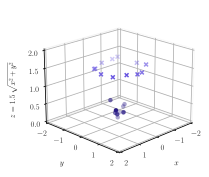

In [72]:
fig = plt.figure(figsize=(5, 3))

x1, y1 = np.random.multivariate_normal([0, 0], 0.03 * np.eye(2), 10).T
x2 = np.array([-1, -.5, -.8, -.7, -.3,  0, 0,  .5, .55,  .7, 1, .85])
y2 = np.array([0 , -.9, .7 , -.8, .95, -1, 1, 0.9, -.8, -.7, 0, .5])

ax = fig.add_subplot(1, 1, 1, projection='3d')

proj = lambda x, y: 1.5*np.sqrt((x**2 + y**2))

ax.scatter(x1, y1, proj(x1, y1), color=blues[0], linewidth=0)
ax.scatter(x2, y2, proj(x2, y2), color=blues[1], marker='x', s=15, linewidths=1.5)

ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.tick_params(axis='both', which='major', pad=-2, labelsize=8)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(0, 2)

ax.set_xlabel('$x$', labelpad=0, fontsize=8)
ax.set_ylabel('$y$', labelpad=0, fontsize=8)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel(r'$z=1.5 \, \sqrt{x^2 + y^2}$', rotation=90, labelpad=-2, fontsize=8)
ax.view_init(20, 45)

# fig.savefig('figs/basis-change-3d.pdf')
plt.show()

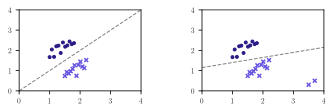

In [120]:
fig, axs = plt.subplots(1, 2, figsize=(5.5, 1.5))
fig.subplots_adjust(wspace=0.5)

x1 = np.linspace(1, 1.8, 12)
y1 = x1 + np.abs(np.random.normal(0, 0.3, size=x1.shape)) + 0.5
x2 = np.linspace(1.5, 2.2, 12)
y2 = x2 - np.abs(np.random.normal(0, 0.3, size=x2.shape)) - 0.5

for ax in axs:
  ax.set_xlim(0, 4)
  ax.set_ylim(0, 4)
  ax.scatter(x1, y1, color=blues[0])
  ax.scatter(x2, y2, color=blues[1], marker='x', s=15, linewidths=1.5)

x = np.linspace(0, 4)
axs[0].plot(x, x, color='gray', linestyle='--', linewidth=1)
axs[1].plot(x, 0.25*x + 1.15, color='gray', linestyle='--', linewidth=1)
axs[1].scatter([3.5, 3.7], [0.3, 0.5], color=blues[1], marker='x', s=15, linewidths=1.5)

# fig.savefig('figs/outliers.pdf')
plt.show()


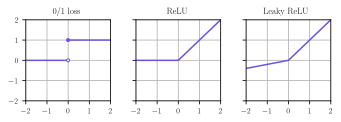

In [144]:
fig, axs = plt.subplots(1, 3, figsize=(5.5, 1.5))
fig.subplots_adjust(wspace=0.3)

x = np.linspace(-2, 2, 100)

for ax in axs:
  ax.set_xlim(-2, 2)
  ax.set_ylim(-2, 2)
  ax.set_xticks((-2, -1, 0, 1, 2))
  ax.set_yticks((-2, -1, 0, 1, 2))
  ax.grid(zorder=-1)

for ax in axs[1:]:
  ax.set_yticks([])

axs[0].plot(x[x < 0], np.zeros_like(x[x < 0]), color=blues[1])
axs[0].plot(x[x > 0], np.ones_like(x[x < 0]), color=blues[1])
axs[0].scatter(0, 1, marker='o', color=blues[1], zorder=2)
axs[0].scatter(0, 0, marker='o', color=blues[1], zorder=2, facecolors='white')
axs[0].set_title('0/1 loss')

axs[1].plot(x[x < 0], np.zeros_like(x[x < 0]), color=blues[1])
axs[1].plot(x[x > 0], x[x > 0], color=blues[1])
axs[1].set_title('ReLU')

axs[2].plot(x[x < 0], 0.2*x[x < 0], color=blues[1])
axs[2].plot(x[x > 0], x[x > 0], color=blues[1])
axs[2].set_title('Leaky ReLU')


plt.show()
